# NPL

# Problem Statement : Spam Email Classification

# Objective:
Develop a machine learning model that accurately classifies emails as "ham" (non-spam) or "spam". The goal is to create a system that can help users filter out unwanted spam emails and only retain legitimate ones.

# Background:
Spam emails are unsolicited messages sent in bulk, typically for advertising purposes, phishing, or spreading malware. They can be a significant nuisance and pose security risks. Effective spam filtering is crucial for improving user experience and safeguarding against malicious attacks.

In [48]:
import pandas as pd
import nltk 
import numpy as np

In [49]:
sp = pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\New folder\spam1.csv",encoding = 'latin')

In [50]:
sp.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [53]:
#sp = sp.dropna()

In [54]:
sp.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
281,ham,\Wen u miss someone,the person is definitely special for u..... B...,why to miss them,"just Keep-in-touch\"" gdeve.."""
885,ham,\Wen u miss someone,the person is definitely special for u..... B...,why to miss them,"just Keep-in-touch\"" gdeve.."""
1489,ham,\Wen u miss someone,the person is definitely special for u..... B...,why to miss them,"just Keep-in-touch\"" gdeve.."""
2242,ham,"Edison has rightly said, \A fool can ask more ...",GN,GE,"GNT:-)"""
3459,ham,I just lov this line: \Hurt me with the truth,I don't mind,i wil tolerat.bcs ur my someone..... But,"Never comfort me with a lie\"" gud ni8 and swe..."


In [55]:
sp.shape

(8, 5)

In [56]:
sp = sp.where((pd.notnull(sp)), '')

In [57]:
sp.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
281,ham,\Wen u miss someone,the person is definitely special for u..... B...,why to miss them,"just Keep-in-touch\"" gdeve.."""
885,ham,\Wen u miss someone,the person is definitely special for u..... B...,why to miss them,"just Keep-in-touch\"" gdeve.."""
1489,ham,\Wen u miss someone,the person is definitely special for u..... B...,why to miss them,"just Keep-in-touch\"" gdeve.."""
2242,ham,"Edison has rightly said, \A fool can ask more ...",GN,GE,"GNT:-)"""
3459,ham,I just lov this line: \Hurt me with the truth,I don't mind,i wil tolerat.bcs ur my someone..... But,"Never comfort me with a lie\"" gud ni8 and swe..."


In [58]:
sp.shape

(8, 5)

In [59]:
sp = sp.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis = 1)

In [60]:
sp.rename(columns={'v1':'y','v2':'x'},inplace = True)

In [62]:
sp.y.replace({'ham':0,'spam':1},inplace = True)

In [63]:
sp.head()

,y,x
281,0,\Wen u miss someone
885,0,\Wen u miss someone
1489,0,\Wen u miss someone
2242,0,"Edison has rightly said, \A fool can ask more ..."
3459,0,I just lov this line: \Hurt me with the truth


In [64]:
sp.x = sp.x.str.lower()

# first convert into lower or upper case

In [15]:
sp.head(2)

,y,x
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...


In [34]:
from nltk.corpus import stopwords
#nltk.download("stopwords")

In [35]:
len(stopwords.words("english"))

179

In [36]:
stopwords.words("english")
# we remove the stop words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [43]:
import string

In [44]:
len(stopwords.words("english"))

179

In [45]:
l1 = list(stopwords.words("english"))

In [46]:
def text_process(mess):
    """
    1.remove the punctuation
    2.remove the stopwords
    3.return the list of clean textwords
    
    """
    nopunc =[char for char in mess if char not in string.punctuation]
    nopunc ="".join(nopunc)
    
    return[word for word in nopunc.split() if word not in l1]

In [47]:
sp['x'].apply(text_process)

0       [go, jurong, point, crazy, available, bugis, n...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, 2, wkly, comp, win, fa, cup, fin...
3           [u, dun, say, early, hor, u, c, already, say]
4       [nah, dont, think, goes, usf, lives, around, t...
                              ...                        
6771    [2nd, time, tried, 2, contact, u, u, å£750, po...
6772                   [ì, b, going, esplanade, fr, home]
6773                     [pity, mood, soany, suggestions]
6774    [guy, bitching, acted, like, id, interested, b...
6775                                   [rofl, true, name]
Name: x, Length: 6776, dtype: object

In [48]:
from sklearn.feature_extraction.text import CountVectorizer # this use to count each and every
#unique word

In [49]:
import timeit
start = timeit.default_timer()

bow_transformer = CountVectorizer(analyzer = text_process).fit(sp['x'])

stop = timeit.default_timer()
execution_time = stop - start
print("Program Executed in ",execution_time)

Program Executed in  0.7367143000010401


In [50]:
bow_transformer = CountVectorizer(analyzer = text_process).fit(sp["x"])

In [51]:
bow_transformer.vocabulary_

{'go': 3744,
 'jurong': 4640,
 'point': 6371,
 'crazy': 2459,
 'available': 1373,
 'bugis': 1836,
 'n': 5620,
 'great': 3841,
 'world': 9100,
 'la': 4799,
 'e': 2984,
 'buffet': 1834,
 'cine': 2174,
 'got': 3801,
 'amore': 1140,
 'wat': 8863,
 'ok': 5936,
 'lar': 4838,
 'joking': 4608,
 'wif': 8996,
 'u': 8527,
 'oni': 5968,
 'free': 3535,
 'entry': 3119,
 '2': 414,
 'wkly': 9052,
 'comp': 2290,
 'win': 9010,
 'fa': 3257,
 'cup': 2514,
 'final': 3381,
 'tkts': 8304,
 '21st': 434,
 'may': 5283,
 '2005': 421,
 'text': 8143,
 '87121': 836,
 'receive': 6769,
 'questionstd': 6660,
 'txt': 8511,
 'ratetcs': 6713,
 'apply': 1226,
 '08452810075over18s': 71,
 'dun': 2970,
 'say': 7123,
 'early': 2991,
 'hor': 4171,
 'c': 1885,
 'already': 1114,
 'nah': 5627,
 'dont': 2878,
 'think': 8217,
 'goes': 3758,
 'usf': 8657,
 'lives': 5000,
 'around': 1277,
 'though': 8236,
 'freemsg': 3543,
 'hey': 4067,
 'darling': 2578,
 '3': 518,
 'weeks': 8916,
 'word': 9086,
 'back': 1424,
 'id': 4290,
 'like': 4

In [52]:
len(bow_transformer.vocabulary_)
# there are 9422 unique word after removing punctuation and stopwords
# that when we create TDM our tdm will have 9422 cols

9422

In [53]:
tdm = bow_transformer.transform(sp['x'])

In [54]:
tdm.shape

(6776, 9422)

In [55]:
type(tdm)

scipy.sparse._csr.csr_matrix

In [56]:
#tdm is like pur x variable
from sklearn.model_selection import train_test_split
tdm_train , tdm_test , train_y , test_y = train_test_split(tdm , sp["y"] ,test_size =.2)

In [57]:
from sklearn.naive_bayes import MultinomialNB

In [58]:
nb = MultinomialNB()
nb.fit(tdm_train,train_y)

MultinomialNB()

In [59]:
pred_nb = nb.predict(tdm_test)

In [60]:
from sklearn.metrics import confusion_matrix

In [61]:
tab_nb = confusion_matrix(test_y , pred_nb)
tab_nb

array([[1147,   25],
       [   8,  176]], dtype=int64)

In [62]:
tab_nb.diagonal().sum() / tab_nb.sum()*100

97.56637168141593

In [64]:
from sklearn.tree import DecisionTreeClassifier

dt =  DecisionTreeClassifier()

In [65]:
dt.fit(tdm_train,train_y)

DecisionTreeClassifier()

In [66]:
pred_dt = dt.predict(tdm_test)

In [67]:
from sklearn.metrics import confusion_matrix

In [68]:
tab_dt = confusion_matrix(test_y , pred_dt)
tab_dt

array([[1158,   14],
       [  23,  161]], dtype=int64)

In [69]:
tab_dt.diagonal().sum() / tab_dt.sum()*100

97.27138643067846

In [70]:
#RANDOM FOREST

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
rfc = RandomForestClassifier()

In [73]:
rfc.fit(tdm_train,train_y)

RandomForestClassifier()

In [74]:
pred_rfc = rfc.predict(tdm_test)

In [75]:
tab_rfc = confusion_matrix(test_y , pred_rfc)
tab_rfc

array([[1172,    0],
       [  27,  157]], dtype=int64)

In [76]:
tab_logreg = confusion_matrix(test_y, pred_nb)
tab_logreg


array([[1147,   25],
       [   8,  176]], dtype=int64)

In [77]:
#LOGICSTIC REGRESSION

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
logreg = LogisticRegression()
logreg.fit(tdm_train,train_y)

LogisticRegression()

In [80]:
pred_train =logreg.predict(tdm_train)


In [81]:
tab_logreg = confusion_matrix(test_y, pred_nb)
tab_logreg


array([[1147,   25],
       [   8,  176]], dtype=int64)

In [82]:
tab_logreg.diagonal().sum()/tab_logreg.sum()*100

97.56637168141593

In [65]:
#pip install wordcloud

In [84]:
# word cloud is the pictorial representation of 

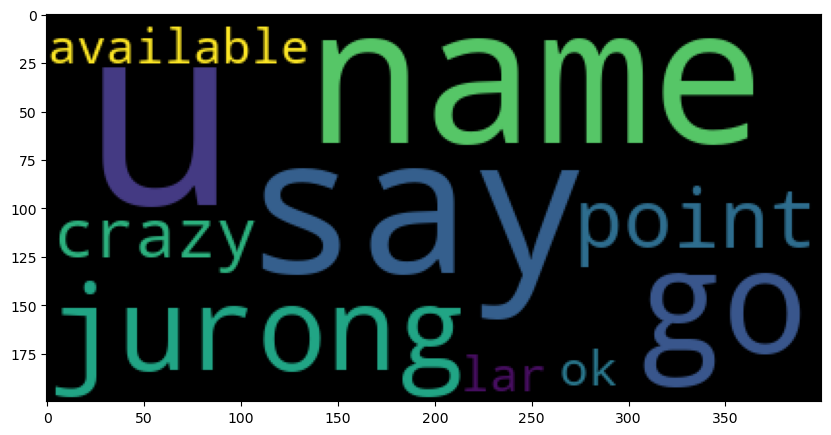

In [85]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
cloud = WordCloud(stopwords = stopwords.words("english"),max_words =10).generate(str(sp['x']))
plt.figure(figsize=(10,10))
plt.imshow(cloud)

In [86]:
sp_spam_df = sp[sp.y ==1] 

In [87]:
sp_spam_df

,y,x
2,1,free entry in 2 a wkly comp to win fa cup fina...
5,1,freemsg hey there darling it's been 3 week's n...
8,1,winner!! as a valued network customer you have...
9,1,had your mobile 11 months or more? u r entitle...
11,1,"six chances to win cash! from 100 to 20,000 po..."
...,...,...
6741,1,want explicit sex in 30 secs? ring 02073162414...
6744,1,asked 3mobile if 0870 chatlines inclu in free ...
6751,1,had your contract mobile 11 mnths? latest moto...
6770,1,reminder from o2: to get 2.50 pounds free call...


In [88]:
import nltk

In [89]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [90]:
nltk.download('vader_lexicon')  #dictionary or words

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
# vader is used for sentiment analysis ---> +ve or -ve

In [91]:
sent = SentimentIntensityAnalyzer()

In [92]:
sent.polarity_scores("cofffee was good and my brain cells final")

{'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'compound': 0.4404}

In [93]:
score = sent.polarity_scores("cofffee was  not good and my brain cells final")
score

{'neg': 0.231, 'neu': 0.769, 'pos': 0.0, 'compound': -0.3412}

In [ ]:
type(score)

In [ ]:
score.keys()

In [ ]:
score['compound']

In [ ]:
ta = pd.read_csv(r"C:\Users\Lenovo\OneDrive\Desktop\Imarticus\python\Trip_advisor_review.csv")

In [ ]:
ta.head()
#consider ou dont have rating col with you

In [ ]:
score_list =[]
for i in tr.Review:
    score = sent.polarity_scores(i)
    score_list.append(score['compound'])

In [2]:
pip install textbolb

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement textbolb (from versions: none)
ERROR: No matching distribution found for textbolb


In [66]:
from textblob import TextBlob
score = TextBlob('food was not tasty and was bad')

In [ ]:
score.sentiment

In [ ]:
#using polarity u can find if sentiment is +ve or -ve
#range of polarity from -1 to +1
#-ve indicates -ve sentiment
#+ve indictaed +ve sentiment

In [ ]:
score = TextBlob('movie was so good that i enjoyed sleeping')
score.sentiment

In [ ]:
score = TextBlob('i reached delhi by flight and my luaage reached calcutta')
score.sentiment

In [ ]:
import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')  #dictionary or words

# vader is used for sentiment analysis ---> +ve or -ve



sent = SentimentIntensityAnalyzer()

sent.polarity_scores("cofffee was good and my brain cells final")

score = sent.polarity_scores("cofffee was  not good and my brain cells final")
score

type(score)

score.keys()

score['compound']



ta = pd.read_csv(r"C:\Users\Lenovo\OneDrive\Desktop\Imarticus\python\Trip_advisor_review.csv")

ta.head()
#consider ou dont have rating col with you

score_list =[]
for i in tr.Review:
    score = sent.polarity_scores(i)
    score_list.append(score['compound'])

pip install textbolb

from textblob import TextBlob
score = TextBlob('food was not tasty and was bad')

score.sentiment

#using polarity u can find if sentiment is +ve or -ve
#range of polarity from -1 to +1
#-ve indicates -ve sentiment
#+ve indictaed +ve sentiment

score = TextBlob('movie was so good that i enjoyed sleeping')
score.sentiment

score = TextBlob('i reached delhi by flight and my luaage reached calcutta')
score.sentiment